In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving 1000_companies.csv to 1000_companies.csv


In [2]:
df = pd.read_csv('1000_companies.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


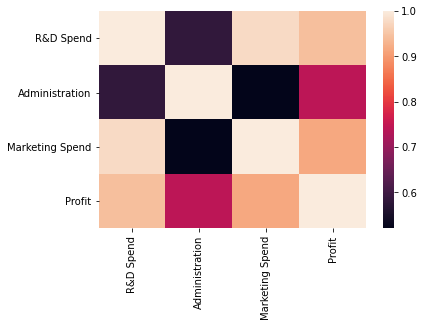

In [29]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 4].values
sns.heatmap(df.corr())

In [30]:
# Encoding and change the label to zeros and ones
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])
X

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       ...,
       [100275.47, 241926.31, 227142.82, 0],
       [128456.23, 321652.14, 281692.32, 0],
       [161181.72, 270939.86, 295442.17, 2]], dtype=object)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

model = LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(x_test)
y_pred

array([166344.25628998,  72472.74722401, 139636.54543129,  94135.54861409,
        84584.22756514,  86918.09109276, 100920.86293542, 121426.63022733,
       128808.11257695,  98953.30450169, 138815.66058511, 139329.35330771,
       128866.43599105, 184528.30418177,  76475.62215182,  72550.79770916,
       161631.34400014, 156806.65837914, 117113.40509948,  71983.07005564,
       173649.26716506, 129026.75730347,  99367.50430275, 114553.89896221,
        72517.41564974,  81845.59895533, 103095.91602016, 183066.06607268,
       130641.73382798, 176742.124891  , 183517.93635242, 181029.82365899,
       255014.33659629, 167735.44186097, 141221.4343102 , 169428.53702037,
       114354.98126018, 121167.60555825,  89993.79486549, 101055.45328172,
        53222.58109699, 140153.73711874,  64722.52306394,  79008.40332621,
       155768.98056437, 165046.55970758,  77842.72402752, 176900.93533387,
        76486.70402234,  51234.5061378 , 128401.42753183,  87959.33601343,
       119796.2833578 , 1

In [0]:
coeff = model.coef_
intercept = model.intercept_

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8147336320299733